## 实验一：基于三层感知机实现手写数字识别


本实验的目的是掌握神经网络的设计原理，掌握神经网络的训练和推理方法。能够使用python语言实现一个可以进行手写数字分类的三层全连接神经网络的训练和推理

### 1. 实验目的

本实验的目的是掌握神经网络的设计原理，掌握神经网络的训练和推理方法。能够使用python语言实现一个可以进行手写数字分类的三层全连接神经网络的训练和推理，主要包括：

- 实现三层神经网络模型进行手写数字分类，建立完整的神经网络工程，通过本实验理解神经网络中基本模块的作用和模块间的联系，为后续建立更复杂的神经网络奠定基础。

- 利用python语言实现神经网络的基本单元的前向传播和反向传播，加深对神经网络中基本单元（全连接层、激活函数、损失函数等）的理解。

- 利用python语言实现神经网络训练所使用的梯度下降算法，加深对神经网络训练过程的理解.

### 2. 背景介绍
### 2.1 MLP网络原理介绍
典型的MLP包括：输入层、隐含层和输出层，MLP神经网络不同层之间是全连接的（即全连接层）。MLP网络主要有三个基本要素：权重、偏置和激活函数。

权重：神经元之间的连接强度由权重表示，权重的大小表示可能性的大小。\
偏置：即神经元的激活阈值，控制激活感知器的难易度。\
激活函数：起非线性映射的作用，加强神经网络的拟合能力。\
下图为三层MLP网络的示意图，左侧为输入层，中间两层为隐含层，右侧为输出层。

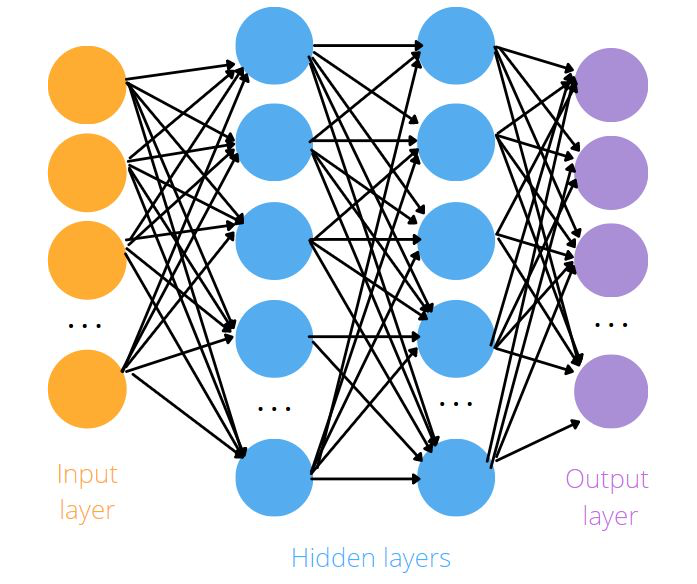

### 2.2 全连接层原理介绍
全连接层中每一个结点都与上一层的所有结点相连，其本质为由一个特征空间线性变换到另一个特征空间，核心操作为矩阵向量相乘。全连接层以向量作为输入，输入与权重相乘后再与偏置相加得到输出向量。即对输入数据进行线性变换，公式如下：

**全连接层前向传播**：
$$
Y=XW^T+b
$$
其中：输入为X，输出为Y，权重为矩阵W，偏置为b。

**全连接层反向传播**：
$$
\nabla_WL=X^T\nabla_YL\\
\nabla_bL=1*\nabla_YL\\
\nabla_XL=\nabla_YLW
$$
其中，以第一层全连接层为例：

前向过程中，输入$X$ 的`shape`为(64,784)，权重矩阵$W$的`shape`为(128,784)，偏置$b$的`shape`为(128,)经过堆叠扩充至(64,128)，输出$Y$的`shape`为(64,128)；

反向过程中，输入梯度$\nabla_YL$的`shape`为(64,128)，权重梯度$\nabla_WL$的`shape`(784,128)，输出梯度$\nabla_bL$的`shape`为(128)，输出梯度$\nabla_XL$的`shape`为(64,784)。

偏置梯度$\nabla_bL$为全1的向量$1$与$\nabla_YL$相乘。即$\nabla_bL(128,)=\nabla_bL(1,128)=1(1,64)*\nabla_YL(64,128)$

注：**numpy.matmul()** 函数返回两个数组的矩阵乘积。在numpy中存在广播机制，如果任一参数是1-D数组，则通过在其维度上附加1来将其提升为矩阵，在乘法后将其删除。


算子初始化参数：
- in_features：输入样本尺寸 
- out_features：输出样本尺寸 
- has_bias：是否使用偏置，默认为True

### 2.3 激活函数层原理介绍
激活函数对于人工神经网络模型学习、理解复杂和非线性的函数来说具有十分重要的作用。它们将非线性特性引入到网络中，增强网络模型的拟合能力。若没有激活函数，无论网络有多少层，输出都是输入的线性组合，缺乏应对非线性模型的能力。\
激活函数按元素进行运算，将输出非线性映射。本实验中使用`ReLU`激活函数，公式如下：
**`ReLU`层前向传播**：
$$
y=max(0,x)
$$

其中，函数将输入中元素值小于0的对应输出置零。反向传播时，当输入大于0，该位置对应的梯度不变，当输入小于0，该位置对应的梯度置零。因此ReLU激活函数中第个输入的偏导公式为：

**`ReLU`层反向传播**：
$$
\nabla_{x(i)}L=\begin{cases} 
\nabla_{y(i)}L\qquad x(i)\geq0\\
0\qquad \qquad x(i)<0\\
\end{cases}
$$
其中：$\nabla_{y(i)}L$为输入梯度，$\nabla_{x(i)}L$为输出梯度；逐元素判断梯度是否$\geq 0$。

### 2.4 损失函数原理介绍
损失函数是指将随机事件或其有关随机变量的取值映射为非负实数以表示该随机事件的“风险”或“损失”的函数。在应用中，损失函数通常作为学习准则与优化问题相联系，即通过最小化损失函数求解和评估模型。

**交叉熵前向传播**：\
本实验中，损失为预测值和真实值的差值，使用交叉熵损失函数，公式如下：
$$
softmax =\frac{e^{X(i,j)}}{\sum_j{e^{X(i,j)}}}  
$$
$$
\\logsoftmax =ln( softmax )\\ \
loss = -\frac{1}{p}\sum_{i,j}Y(i,j)logsoftmax
$$
其中：$X(i,j)$（64,10）为上一层的输出，求得上层输出的 $softmax$ 后取对数得到 $logsoftmax $（64,10）；

$Y(i,j)$（64,10）为对应真实值的 $one hot$ 编码；$p$（64,）为 $batch$ 样本数量。


**交叉熵反向传播**：\
反向传播时，损失函数对输入的偏导公式为：
$$
\nabla_{x}L=\frac{1}{p}(\hat{Y}-Y)
$$
其中：$\hat{Y}$（64,10）为前向传播时的 $softmax$ 输出，$Y$（64,10）为真实值的 $one hot$ 编码，两者`shape`相同；$\nabla_{x}L$（64,10）为输出梯度。

### 3. 实验环境
环境要求：支持CPU、GPU、Ascend，只需用到python 3以上版本和numpy依赖

### 4. 数据处理
### 4.1 数据准备
实验数据集MNIST，是机器学习领域中非常经典的一个数据集，由250个不同的人手写而成，总共有70000张手写数据集。其中训练集有60000张，测试集有10000张。每张图片大小为28×28。

请点击数据集链接，下载以下数据集，下载的
exp1_mnist.zip解压，文件夹重命名为data，保存到code文件夹下，和notebook同步目录，目录如下：

目录结构如下：\
./\
|── components.py \
|── dataloader.py \
|── exp1.log \
|── main.py \
|── mnist \
|&nbsp;&nbsp;&nbsp;&nbsp;   |── train_images.npy \
|&nbsp;&nbsp;&nbsp;&nbsp;   |── train_labels.npy \
|&nbsp;&nbsp;&nbsp;&nbsp;   |── val_images.npy \
|&nbsp;&nbsp;&nbsp;&nbsp;   |── val_labels.npy

数据集下载链接如下，提供numpy可直接读取的npy格式：
https://openi.pcl.ac.cn/attachments/054e4523-04a5-45a5-bcc4-13492bc1a7e1?type=0

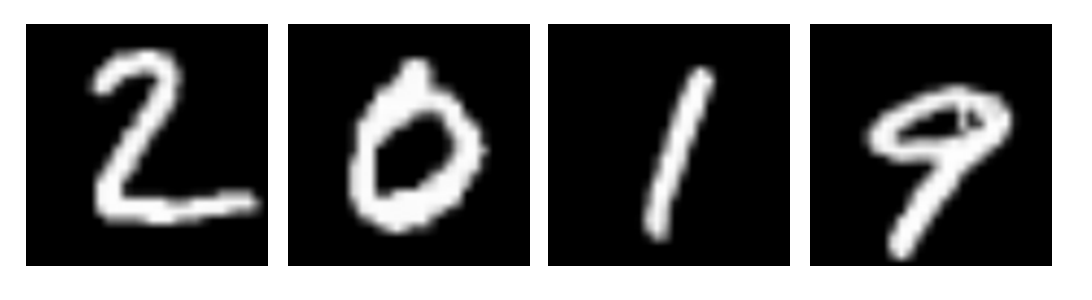

### 4.2 数据加载
数据加载实现如下，加载mnist数据集：

In [1]:
class DataLoader(object):
    def __init__(self, mnist_npy_dir, batch_size=16, mode='train'):
        self.mode = mode
        self.mnist_npy_dir = mnist_npy_dir
        self.input_data, self.input_label = None, None
        self.prepare_data()
        self.batch_size = batch_size
        self.batch_nums = len(self.input_data) // batch_size

    def shuffle_data(self):
        tmp = list(zip(self.input_data, self.input_label))
        random.shuffle(tmp)
        self.input_data, self.input_label = zip(*tmp)

    def prepare_data(self):
        images = np.load(os.path.join(self.mnist_npy_dir, self.mode + '_images.npy'))
        labels = np.load(os.path.join(self.mnist_npy_dir, self.mode + '_labels.npy')).squeeze()
        self.input_data, self.input_label = images, labels
        if self.mode == 'train':
            self.shuffle_data()

    def get_data(self, batch_index):
        data = self.input_data[batch_index * self.batch_size:(batch_index + 1) * self.batch_size]
        label = self.input_label[batch_index * self.batch_size:(batch_index + 1) * self.batch_size]
        if self.mode == 'train':
            if len(data) == len(label) == self.batch_size:
                pass
            else:
                diff = self.batch_size - len(data)
                for _ in range(diff):
                    index = random.randint(1, len(self.input_data) - 1)
                    pad_data = self.input_data[index:index + 1]
                    pad_label = self.input_label[index:index + 1]
                    data += pad_data
                    label += pad_label
        data = np.array(data)
        label = np.array(label)

        return data, label

### 5. 模型构建

导入下列依赖包

In [2]:
import os
import numpy as np

### 5.1 全连接层实现 
根据2.2的全连接层原理介绍，根据公式完成全连接层的前向和反向传播过程。

In [3]:
class FullyConnectLayer(object):
    def __init__(self, in_features, out_features, has_bias=True):
        # 初始化权重和偏置
        self.weight = np.random.normal(loc=0, scale=0.01, size=(out_features, in_features))
        self.bias = np.zeros(out_features) if has_bias else None
        self.has_bias = has_bias # 是否使用偏置，默认为True

        self.inputs = None
        self.grad_weight = None
        self.grad_bias = None

    def forward(self, inputs):
        # 根据公式编写全连接层的前向传播过程
        self.inputs = inputs
        bias = np.stack([self.bias for _ in range(inputs.shape[0])]) if self.has_bias else 0
        outputs = np.dot(inputs, self.weight.T) + bias
        return outputs

    def backward(self, in_grad):
        # 根据公式编写全连接层的反向传播过程
        self.grad_weight = np.dot(self.inputs.T, in_grad)
        self.grad_bias = np.mean(in_grad, axis=0)
        out_grad = np.dot(in_grad, self.weight)
        return out_grad
    
    def update_params(self, lr):
        # 根据公式编写全连接层的参数更新过程
        self.weight = self.weight - lr * self.grad_weight.T
        if self.has_bias:
            self.bias = self.bias - lr * self.grad_bias

    def load_params(self, weight, bias):
        # 加载权重和偏置
        assert self.weight.shape == weight.shape
        self.weight = weight
        if self.has_bias:
            assert self.bias.shape == bias.shape
            self.bias = bias

### 5.2 激活函数层实现
根据2.3的激活函数层原理介绍，根据公式完成ReLU的前向和反向传播过程。

In [4]:
class ReluLayer(object):
    def __init__(self):
        self.inputs = None

    def forward(self, inputs):
        # 根据公式编写激活函数ReLU的前向传播过程
        self.inputs = inputs
        outputs = np.maximum(self.inputs, 0)
        return outputs

    def backward(self, in_grad):
        # 根据公式编写激活函数ReLU的反向传播过程
        b = self.inputs
        b[b > 0] = 1
        b[b < 0] = 0
        out_grad = np.multiply(b, in_grad)
        return out_grad

### 5.3 损失函数实现
根据2.4的损失函数原理介绍，根据公式完成交叉熵函数的前向和反向传播过程。

In [5]:
class CrossEntropy(object):
    def __init__(self, dim=1):
        self.softmax_out = None
        self.label_onehot = None
        self.batch_size = None
        self.dim = dim
        
    def _softmax(self, inputs, dim=1):
        input_exp = np.exp(inputs)
        partsum = np.sum(input_exp, axis=dim)
        partsum = np.repeat(np.expand_dims(partsum, axis=dim), inputs.shape[dim], axis=dim)
        result = input_exp / partsum
        return result

    def forward(self, inputs, labels):
        # 根据公式编写交叉熵损失函数的前向传播过程
        self.softmax_out = self._softmax(inputs, dim=self.dim)
        self.batch_size, out_size = self.softmax_out.shape
        self.label_onehot = np.eye(out_size)[labels]
        log_softmax = np.log(self.softmax_out)
        outputs = -np.sum(self.label_onehot * log_softmax) / labels.shape[0]
        return outputs

    def backward(self, in_grad):
        # 根据公式编写交叉熵损失函数的反向传播过程
        out_grad = (self.softmax_out - self.label_onehot) / self.batch_size
        return out_grad

### 6. 模型构建
搭建的MLP模型架构实现如下：

In [6]:
class MlpMnistModel(object):
    def __init__(self, input_size, hidden1, hidden2, out_size):
        self.input_size = input_size
        self.hidden1 = hidden1
        self.hidden2 = hidden2
        self.out_size = out_size

        # 初始化网络中各组件
        self.fc1 = FullyConnectLayer(self.input_size, self.hidden1)
        self.fc2 = FullyConnectLayer(self.hidden1, self.hidden2)
        self.fc3 = FullyConnectLayer(self.hidden2, self.out_size)
        self.relu1 = ReluLayer()
        self.relu2 = ReluLayer()
        
        # 定义需要更新参数的组件列表
        self.update_layer_list = [self.fc1, self.fc2, self.fc3] 

    def forward(self, x):
        # 前向传播流程
        x = self.fc1.forward(x)
        x = self.relu1.forward(x)
        x = self.fc2.forward(x)
        x = self.relu2.forward(x)
        x = self.fc3.forward(x)
        return x

    def backward(self, dloss):
        # 反向传播流程
        dh2 = self.fc3.backward(dloss)
        dh2 = self.relu2.backward(dh2)
        dh1 = self.fc2.backward(dh2)
        dh1 = self.relu1.backward(dh1)
        dh1 = self.fc1.backward(dh1)

    def step(self, lr):
        # 参数更新
        for layer in self.update_layer_list:
            layer.update_params(lr)

    def save_model(self, param_dir):
        # 保存权重和偏置
        params = {}
        params['w1'], params['b1'] = self.fc1.weight, self.fc1.bias
        params['w2'], params['b2'] = self.fc2.weight, self.fc2.bias
        params['w3'], params['b3'] = self.fc3.weight, self.fc3.bias
        np.save(param_dir, params)

    def load_model(self, params):
        # 加载权重和偏置
        self.fc1.load_params(params['w1'], params['b1'])
        self.fc2.load_params(params['w2'], params['b2'])
        self.fc3.load_params(params['w3'], params['b3'])

### 7. 模型训练与验证
模型训练实现如下，并得到验证集上的精度：

In [7]:
from dataloader import DataLoader

mnist_npy_dir = './mnist'	# 数据集地址
epochs = 5 # 训练轮次
batch_size = 32 # batch size
lr = 0.01 # 学习率
print_freq = 100 # 打印频率
train_data_loader = DataLoader(mnist_npy_dir, batch_size=batch_size, mode='train')
val_data_loader = DataLoader(mnist_npy_dir, batch_size=batch_size, mode='val')

model = MlpMnistModel(input_size=784, hidden1=128, hidden2=64, out_size=10) # 初始化模型
criterion = CrossEntropy() # 初始化损失函数

best_loss = 999
for idx_epoch in range(epochs):
    # 训练
    train_data_loader.shuffle_data() # 每一个新轮次打乱一次数据
    for id_1 in range(train_data_loader.batch_nums):
        train_data, train_labels = train_data_loader.get_data(id_1) # 读取训练数据
        output = model.forward(train_data) # 前向传播
        loss = criterion.forward(output, train_labels) # 计算损失
        dloss = criterion.backward(loss) # 损失函数反向
        model.backward(dloss) # 反向传播
        model.step(lr) # 参数更新

        if id_1 % print_freq == 0:
            print('Train Epoch %d, iter %d, loss: %.6f' % (idx_epoch, id_1, loss))
    # 验证
    mean_val_loss = []
    pred_results = np.zeros([val_data_loader.input_data.shape[0]]) # 保存推理结果
    for id_2 in range(val_data_loader.batch_nums):
        val_data, val_labels = val_data_loader.get_data(id_2) # 读取验证数据
        prob = model.forward(val_data) # 前向传播（即推理）
        val_loss = criterion.forward(prob, val_labels) # 计算损失
        mean_val_loss.append(val_loss)
        pred_labels = np.argmax(prob, axis=1) # 获取推理结果
        pred_results[id_2 * val_labels.shape[0]:(id_2 + 1) * val_labels.shape[0]] = pred_labels 
        # 保存推理结果

        if id_2 % print_freq == 0:
            print('Val Epoch %d, iter %d, loss: %.6f' % (idx_epoch, id_2, val_loss))

    accuracy = np.mean(pred_results == val_data_loader.input_label) # 计算准确率
    mean_val_loss = np.array(mean_val_loss).mean() # 计算平均损失
    print('Val Epoch: %d, Loss: %.6f, Acc: %.6f' % (idx_epoch, mean_val_loss, accuracy))

    # 保存最优模型
    if mean_val_loss <= best_loss:
        best_loss = mean_val_loss
        if not os.path.exists('ckpts'):
            os.mkdir('ckpts')
        model.save_model(os.path.join('ckpts', 'epoch_%d_loss_%.6f.npy' % (idx_epoch, mean_val_loss)))

Train Epoch 0, iter 0, loss: 2.302077
Train Epoch 0, iter 100, loss: 1.031010
Train Epoch 0, iter 200, loss: 0.328215
Train Epoch 0, iter 300, loss: 0.208409
Train Epoch 0, iter 400, loss: 0.204610
Train Epoch 0, iter 500, loss: 0.204533
Train Epoch 0, iter 600, loss: 0.371549
Train Epoch 0, iter 700, loss: 0.299096
Train Epoch 0, iter 800, loss: 0.127393
Train Epoch 0, iter 900, loss: 0.283360
Train Epoch 0, iter 1000, loss: 0.413334
Train Epoch 0, iter 1100, loss: 0.021278
Train Epoch 0, iter 1200, loss: 0.259219
Train Epoch 0, iter 1300, loss: 0.038857
Train Epoch 0, iter 1400, loss: 0.159394
Train Epoch 0, iter 1500, loss: 0.320991
Train Epoch 0, iter 1600, loss: 0.080151
Train Epoch 0, iter 1700, loss: 0.230871
Train Epoch 0, iter 1800, loss: 0.174033
Val Epoch 0, iter 0, loss: 0.038124
Val Epoch 0, iter 100, loss: 0.083650
Val Epoch 0, iter 200, loss: 0.135675
Val Epoch 0, iter 300, loss: 0.043618
Val Epoch: 0, Loss: 0.133501, Acc: 0.956500
Train Epoch 1, iter 0, loss: 0.031752
T